## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# reading data
path = 'data/china_cancer_patients_synthetic.csv'   #saving the data path
df = pd.read_csv(path)

In [4]:
# checking for breif information about our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PatientID             10000 non-null  object 
 1   Gender                10000 non-null  object 
 2   Age                   10000 non-null  int64  
 3   Province              10000 non-null  object 
 4   Ethnicity             10000 non-null  object 
 5   TumorType             10000 non-null  object 
 6   CancerStage           10000 non-null  object 
 7   DiagnosisDate         10000 non-null  object 
 8   TumorSize             10000 non-null  float64
 9   Metastasis            10000 non-null  object 
 10  TreatmentType         10000 non-null  object 
 11  SurgeryDate           4327 non-null   object 
 12  ChemotherapySessions  10000 non-null  int64  
 13  RadiationSessions     10000 non-null  int64  
 14  SurvivalStatus        10000 non-null  object 
 15  FollowUpMonths      

In [5]:
# statistical analysis
df.describe(include= 'all')

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
count,10000,10000,10000.000000,10000,10000,10000,10000,10000,10000.000000,10000,10000,4327,10000.0000,10000.000000,10000,10000.000000,10000,4079,2800,6285
unique,10000,3,NaN,13,6,6,4,4383,NaN,2,5,2915,NaN,NaN,2,NaN,3,2,3,9
top,CHN-00001,Female,NaN,Guangdong,Han,Lung,II,2016-11-08,NaN,No,Chemotherapy,2019-06-10,NaN,NaN,Alive,NaN,Never,Occasional,EGFR,Hypertension
freq,1,3371,NaN,1841,9110,2561,2971,8,NaN,7301,2072,5,NaN,NaN,7790,NaN,5011,3127,1389,1514
mean,NaN,NaN,51.600200,NaN,NaN,NaN,NaN,NaN,6.339040,NaN,NaN,NaN,3.9990,3.046400,NaN,30.432800,NaN,NaN,NaN,NaN
std,NaN,NaN,19.705608,NaN,NaN,NaN,NaN,NaN,2.234999,NaN,NaN,NaN,6.2036,7.301505,NaN,17.162545,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,0.0000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,0.0000,0.000000,NaN,16.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,0.0000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,NaN,NaN,8.0000,0.000000,NaN,45.000000,NaN,NaN,NaN,NaN


In [6]:
df.dtypes.value_counts()

object     15
int64       4
float64     1
Name: count, dtype: int64

In [7]:
# Check unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:
PatientID: 10000 unique values
Gender: 3 unique values
Province: 13 unique values
Ethnicity: 6 unique values
TumorType: 6 unique values
CancerStage: 4 unique values
DiagnosisDate: 4383 unique values
Metastasis: 2 unique values
TreatmentType: 5 unique values
SurgeryDate: 2915 unique values
SurvivalStatus: 2 unique values
SmokingStatus: 3 unique values
AlcoholUse: 2 unique values
GeneticMutation: 3 unique values
Comorbidities: 9 unique values


In [8]:
df.shape

(10000, 20)

## Data Cleaning

In [9]:
# importing custom tool created to handle missing values

from pipelines import data_cleaning_handler as dc

Filled categorical column 'Comorbidities' using mode


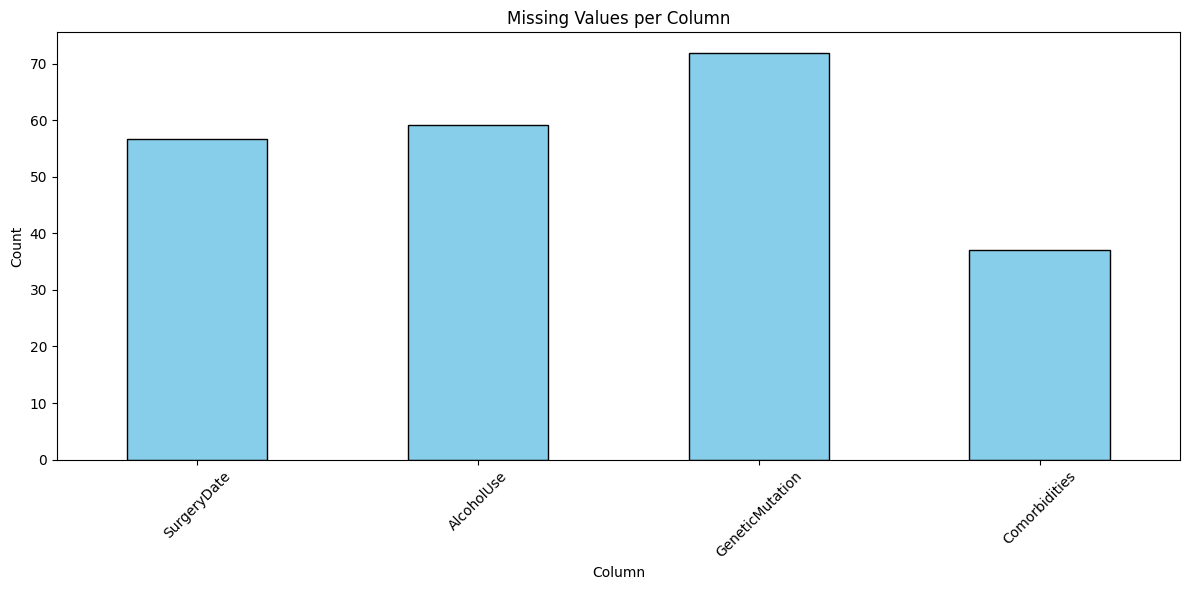

In [10]:
cleaner = dc.DataCleaner()
data = cleaner.remove_null_value(data = df, visualize_null=True)

In [11]:
data.isnull().sum()

PatientID               0
Gender                  0
Age                     0
Province                0
Ethnicity               0
TumorType               0
CancerStage             0
DiagnosisDate           0
TumorSize               0
Metastasis              0
TreatmentType           0
ChemotherapySessions    0
RadiationSessions       0
SurvivalStatus          0
FollowUpMonths          0
SmokingStatus           0
Comorbidities           0
dtype: int64

In [12]:
data = cleaner.check_duplicate(data = data, remove_duplicate= True)

No duplicate rows found.


In [13]:
data.head()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,0,23,Alive,44,Current,Hypertension
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,0,0,Alive,40,Former,Hypertension
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,0,0,Deceased,45,Never,Hypertension
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,4,0,Alive,42,Never,Hypertension


In [14]:
# outlier check IQR
cleaner.outlier_handler(data= data, method= 'IQR', remove_outlier= False)

Age: 0 IQR outliers found.
TumorSize: 27 IQR outliers found.
ChemotherapySessions: 0 IQR outliers found.
RadiationSessions: 1926 IQR outliers found.
FollowUpMonths: 0 IQR outliers found.


,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities,outlier_flag
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,0,23,Alive,44,Current,Hypertension,True
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension",False
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,0,0,Alive,40,Former,Hypertension,False
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,0,0,Deceased,45,Never,Hypertension,False
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,4,0,Alive,42,Never,Hypertension,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,12,0,Alive,57,Never,Hypertension,False
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,20,0,Alive,36,Never,Hepatitis B,False
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,0,0,Alive,35,Former,"Hepatitis B, Hypertension",False
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,2,0,Alive,25,Current,Hypertension,False


In [15]:
# outlier check using z-score
cleaner.outlier_handler(data= data, method= 'Z-score', remove_outlier= False)

Age: 0 Z-score outliers found.
TumorSize: 12 Z-score outliers found.
ChemotherapySessions: 0 Z-score outliers found.
RadiationSessions: 412 Z-score outliers found.
FollowUpMonths: 0 Z-score outliers found.


,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities,outlier_flag
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,0,23,Alive,44,Current,Hypertension,False
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension",False
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,0,0,Alive,40,Former,Hypertension,False
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,0,0,Deceased,45,Never,Hypertension,False
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,4,0,Alive,42,Never,Hypertension,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,12,0,Alive,57,Never,Hypertension,False
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,20,0,Alive,36,Never,Hepatitis B,False
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,0,0,Alive,35,Former,"Hepatitis B, Hypertension",False
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,2,0,Alive,25,Current,Hypertension,False


## **Exploratory Data Analysis**

In [16]:
# Set visualization style
plt.style.use('seaborn-v0_8-dark')
sns.set_palette('viridis')

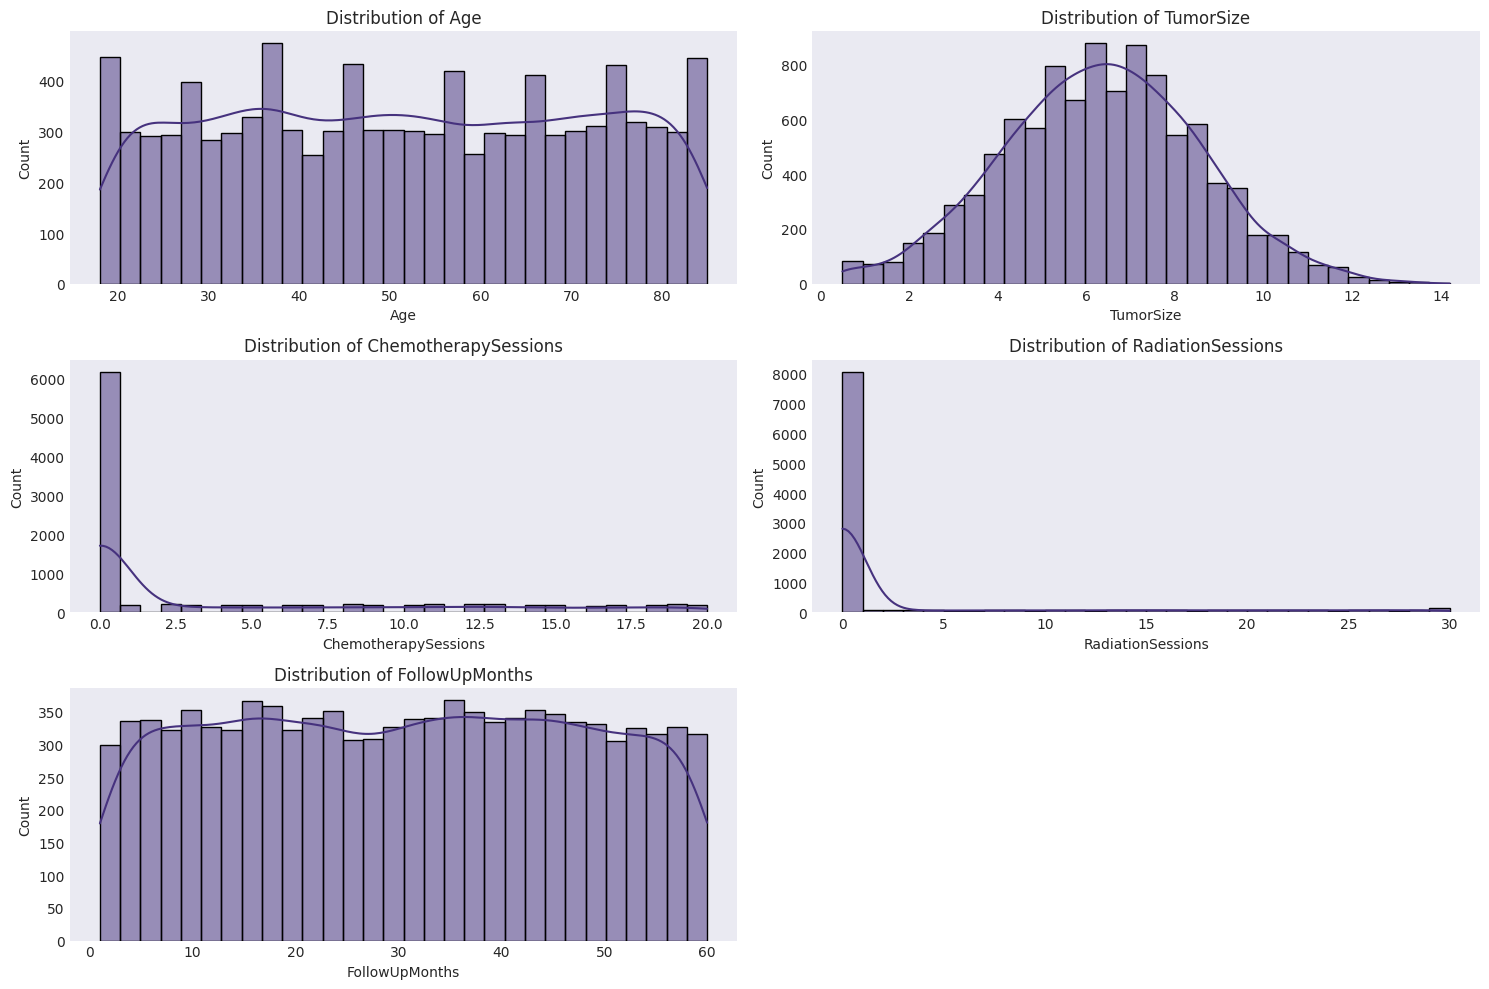

In [17]:
# Numerical features distribution
numerical_cols = ['Age', 'TumorSize', 'ChemotherapySessions', 'RadiationSessions', 'FollowUpMonths']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

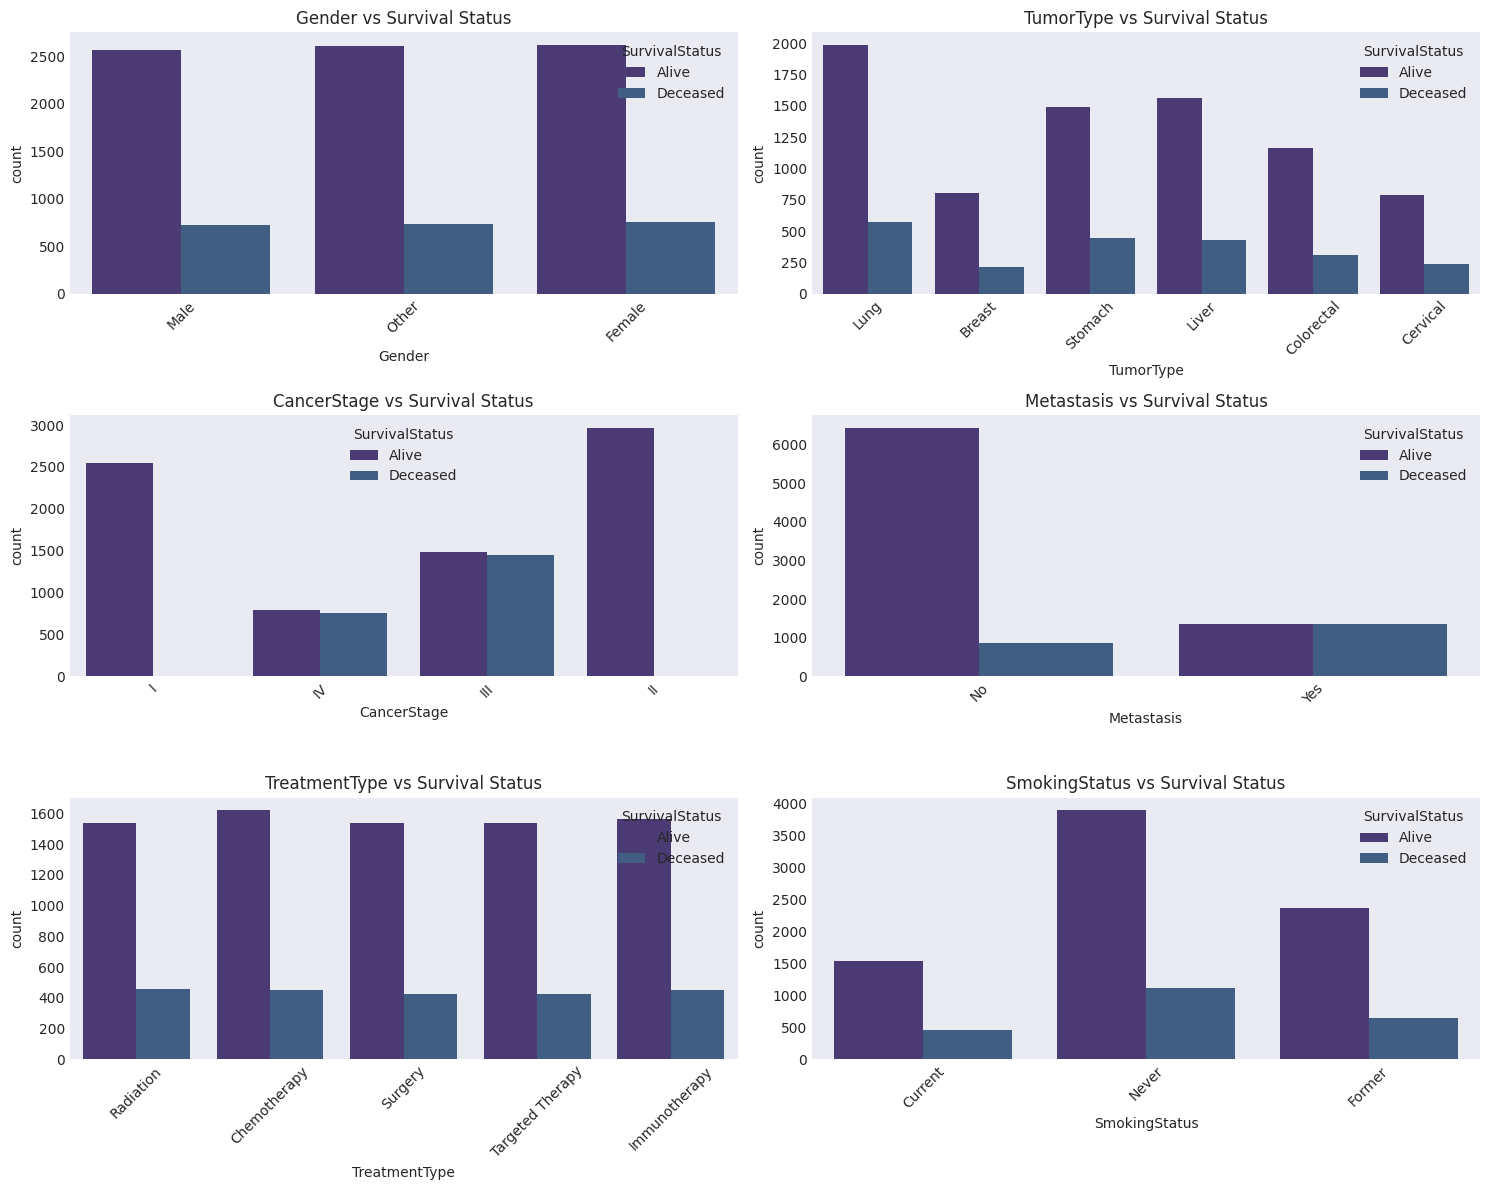

In [18]:
# Categorical features count plots
key_categorical_cols = ['Gender', 'TumorType', 'CancerStage', 'Metastasis', 'TreatmentType', 'SmokingStatus']
plt.figure(figsize=(15, 12))
for i, col in enumerate(key_categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=data, x=col, hue='SurvivalStatus')
    plt.title(f'{col} vs Survival Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

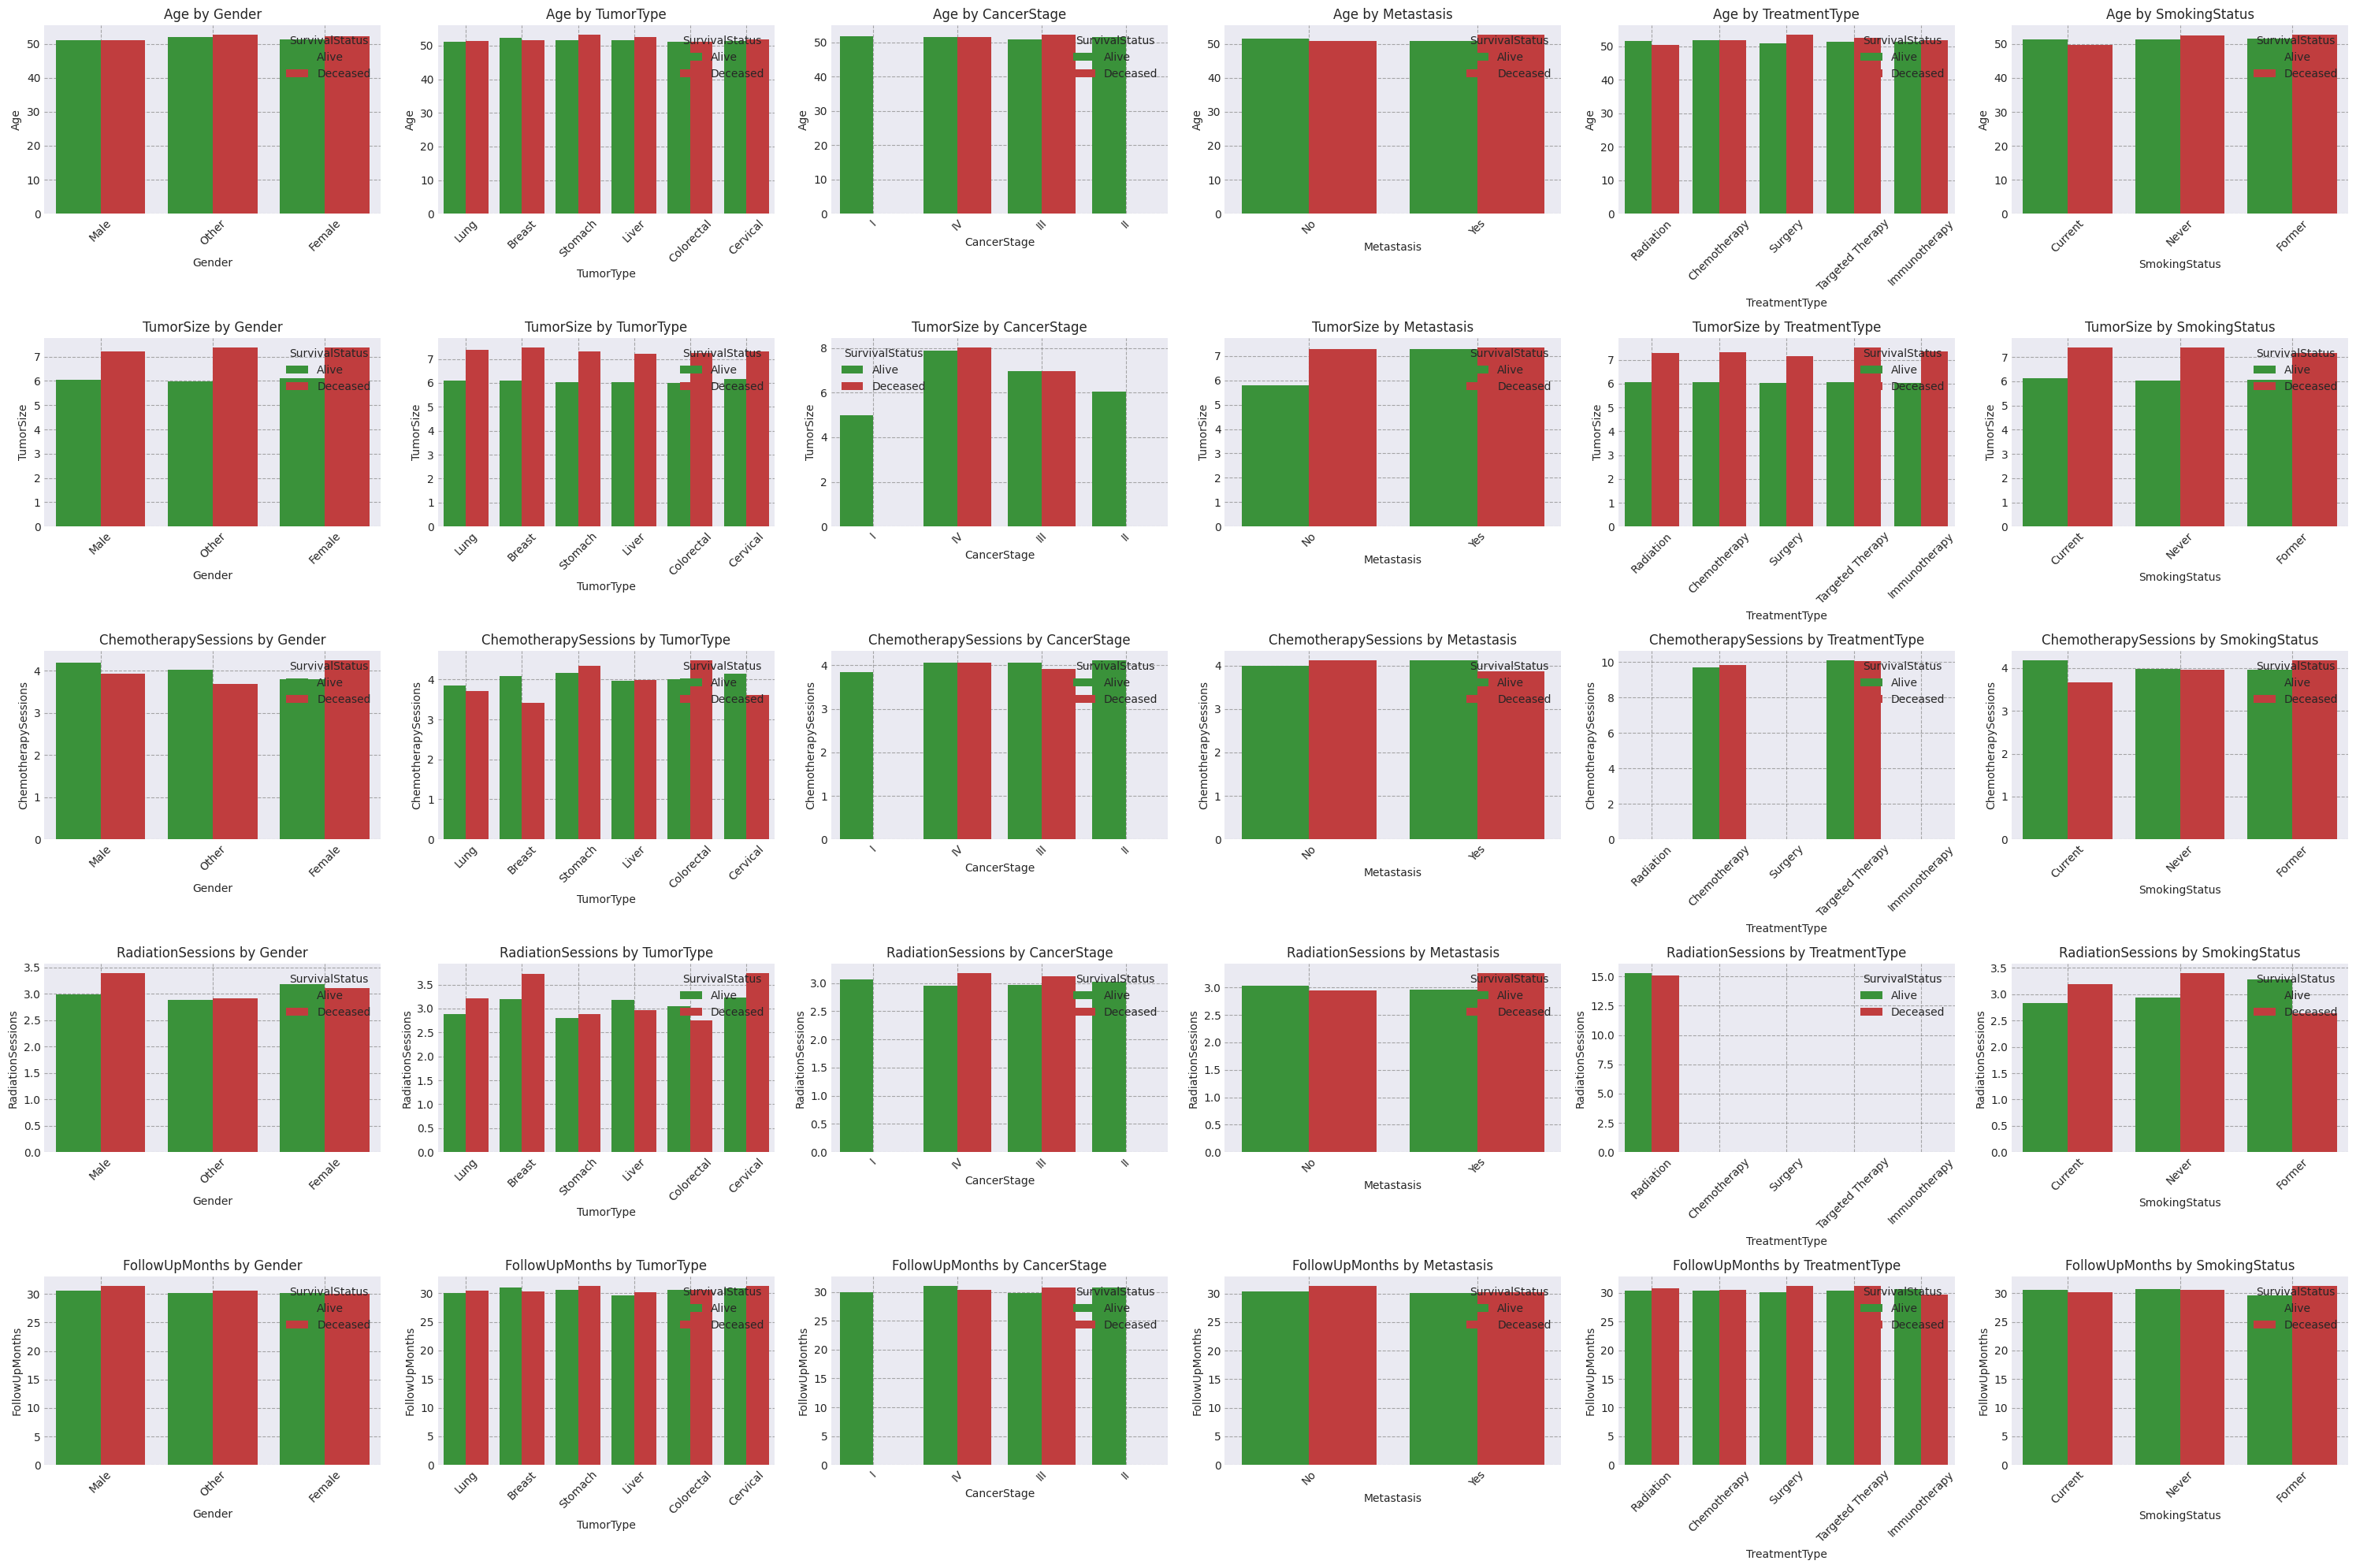

In [19]:
# plotting each numerical column against every categorical column

row_num = len(numerical_cols)
col_per_fig = len(key_categorical_cols)
palette = {'Alive': '#2ca02c', 'Deceased': '#d62728'}


fig, ax = plt.subplots(row_num, col_per_fig, figsize=(5 * col_per_fig, 4 * row_num), squeeze=False)

for i, num_col in enumerate(numerical_cols):
    for j, cat_col in enumerate(key_categorical_cols):
        sns.barplot(
            data=data,
            x=cat_col,
            y=num_col,
            # palette= 'Set2',
            palette= palette,
            hue='SurvivalStatus',
            ci= None,
            ax=ax[i][j]
        )

        ax[i][j].set_title(f'{num_col} by {cat_col}')
        ax[i][j].tick_params(axis='x', rotation=45)
        ax[i][j].grid(True, ls= '--', alpha =0.65, color= 'gray')

plt.tight_layout()
plt.show()


***💡Observation:***

**Age Distribution by Categories**
- The dataset has patients aged 18-85, with most in their 50s-70s

- **We'll likely see:**

    - Higher average age for deceased patients in most categories

    - Stage IV patients may be older on average

    - Different tumor types may have different age distributions (e.g., cervical cancer patients likely younger)
_____
**Tumor Size Patterns**
- Tumor sizes range from 0.5cm to 13.3cm

- **Expected findings:**

    - Larger tumors likely associated with higher cancer stages

    - Metastasis cases may show larger average tumor sizes

    - Certain treatment types (like surgery) may be associated with different tumor size ranges
_____
**Treatment Sessions Analysis**
- Chemotherapy sessions range from 0-20

- Radiation sessions range from 0-30

- Potential insights:

    - Higher stage cancers may have more treatment sessions

    - Deceased patients may show either very high or very low treatment sessions (indicating treatment resistance or inability to tolerate treatment)

    - Different tumor types may have different treatment session patterns
_____
**Follow-up Time Patterns**
- Follow-up ranges from 1-60 months

- We may observe:

    - Longer follow-up for alive patients (survivorship bias)

    - Shorter follow-up for deceased patients in advanced stages

    - Different treatment types may have different follow-up durations
_______
***Specific Expected Findings by Category***

**By Gender:**
- The dataset contains Male, Female and Other gender categories

- Male patients may show higher mortality for lung cancer

- Female patients may show different patterns for breast/cervical cancers

**By Cancer Stage:**
- Clear progression expected in numerical values:

    - Higher stages (III/IV) will show larger tumor sizes

    - Possibly more treatment sessions in advanced stages

    - Shorter follow-up times for stage IV patients

**By Treatment Type:**
- Surgery cases may show smaller tumor sizes (operable cases)

- Radiation/chemotherapy may show different age distributions

- Targeted therapy may be associated with specific genetic mutations

**By Tumor Type:**
- Lung and liver cancers may show worse survival outcomes

- Breast cancer cases may show better survival with smaller tumors

- Stomach cancers appear frequently in the sample and may show distinct patterns

**By Metastasis Status:**
- Metastasis cases will likely show:

    - Larger tumor sizes

    - More advanced stages

    - Higher mortality rates

    - Possibly more treatment sessions

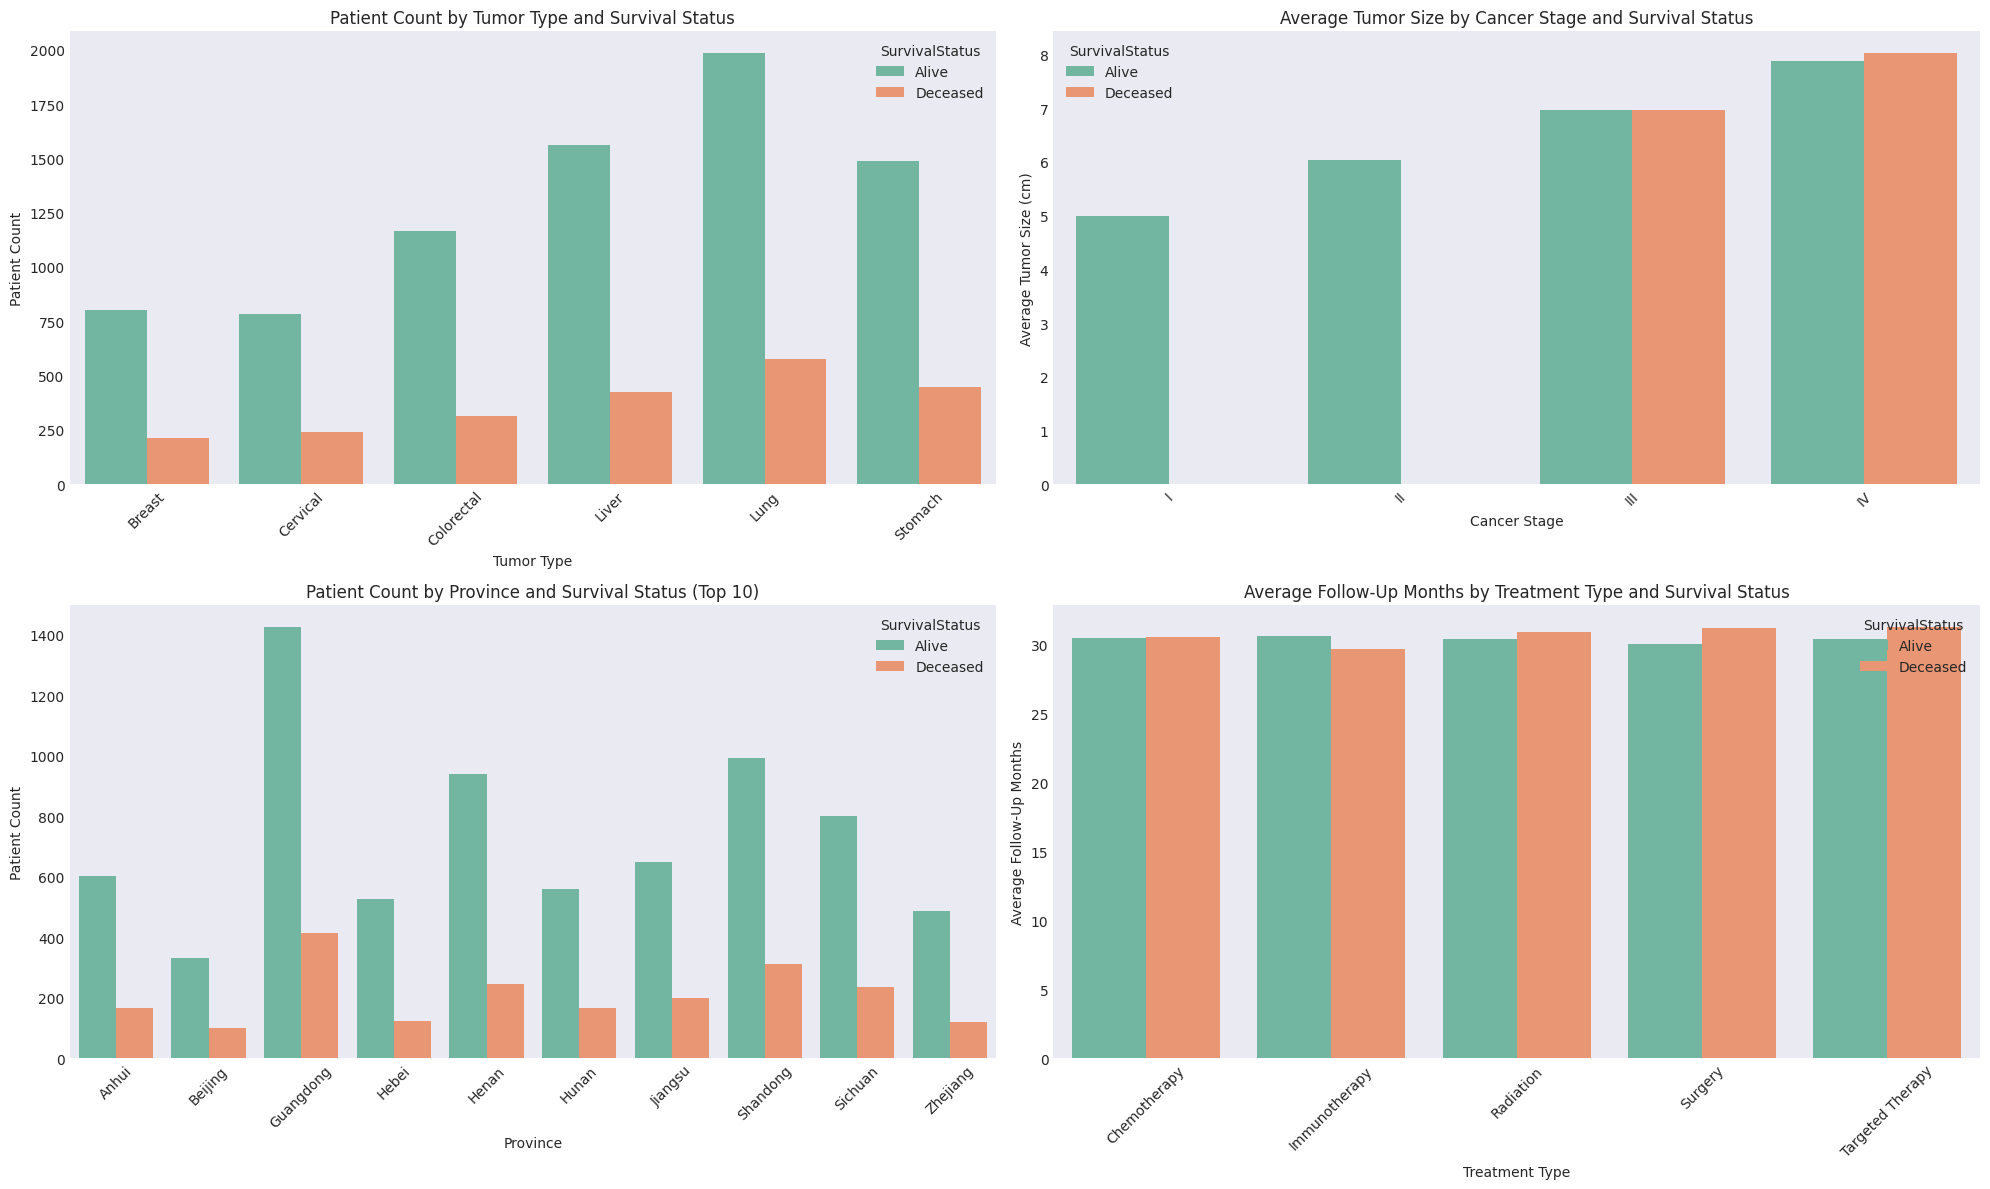

In [20]:
# Define figure for multiple subplots
fig, ax = plt.subplots(2, 2, figsize=(20, 12), squeeze=False)

# 1. Tumor Type by Survival Status (Patient Count)
tumor_survival = data.groupby(['TumorType', 'SurvivalStatus']).size().reset_index(name='Count')
sns.barplot(
    data=tumor_survival,
    x='TumorType',
    y='Count',
    hue='SurvivalStatus',
    ax=ax[0][0],
    palette='Set2'
)
ax[0][0].set_title('Patient Count by Tumor Type and Survival Status')
ax[0][0].tick_params(axis='x', rotation=45)
ax[0][0].set_xlabel('Tumor Type')
ax[0][0].set_ylabel('Patient Count')

# 2. Average Tumor Size by Cancer Stage and Survival Status
tumor_size_stage = data.groupby(['CancerStage', 'SurvivalStatus'])['TumorSize'].mean().reset_index(name='AvgTumorSize')
sns.barplot(
    data=tumor_size_stage,
    x='CancerStage',
    y='AvgTumorSize',
    hue='SurvivalStatus',
    ax=ax[0][1],
    palette='Set2'
)
ax[0][1].set_title('Average Tumor Size by Cancer Stage and Survival Status')
ax[0][1].tick_params(axis='x', rotation=45)
ax[0][1].set_xlabel('Cancer Stage')
ax[0][1].set_ylabel('Average Tumor Size (cm)')

# 3. Survival Status by Province (Top 10 by patient count)
province_survival = data.groupby(['Province', 'SurvivalStatus']).size().reset_index(name='Count')
top_provinces = province_survival.groupby('Province')['Count'].sum().nlargest(10).index
province_survival_top = province_survival[province_survival['Province'].isin(top_provinces)]
sns.barplot(
    data=province_survival_top,
    x='Province',
    y='Count',
    hue='SurvivalStatus',
    ax=ax[1][0],
    palette='Set2'
)
ax[1][0].set_title('Patient Count by Province and Survival Status (Top 10)')
ax[1][0].tick_params(axis='x', rotation=45)
ax[1][0].set_xlabel('Province')
ax[1][0].set_ylabel('Patient Count')

# 4. Average Follow-Up Months by Treatment Type and Survival Status
followup_treatment = data.groupby(['TreatmentType', 'SurvivalStatus'])['FollowUpMonths'].mean().reset_index(name='AvgFollowUpMonths')
sns.barplot(
    data=followup_treatment,
    x='TreatmentType',
    y='AvgFollowUpMonths',
    hue='SurvivalStatus',
    ax=ax[1][1],
    palette='Set2'
)
ax[1][1].set_title('Average Follow-Up Months by Treatment Type and Survival Status')
ax[1][1].tick_params(axis='x', rotation=45)
ax[1][1].set_xlabel('Treatment Type')
ax[1][1].set_ylabel('Average Follow-Up Months')

# Adjust layout and display
plt.tight_layout()
plt.show()


***Insights from the Data:***

1. *Tumor Type by Survival Status: Lung cancer has the highest patient count, with a notable proportion of deceased patients, especially in later stages.*
2. *Average Tumor Size by Cancer Stage: Larger tumor sizes in Stage IV correlate with higher mortality, while early stages (I, II) show smaller sizes and better survival.*
3. *Survival Status by Province: Guangdong and Shandong have high patient counts, with varied survival outcomes, possibly due to population density and healthcare access.*
4. *Average Follow-Up Months by Treatment: Patients on targeted therapy and surgery show longer follow-up periods for survivors, suggesting better long-term monitoring or outcomes.*



*checking for relationship between numerical columns using covariance*

In [21]:
df.cov(numeric_only= True)

,Age,TumorSize,ChemotherapySessions,RadiationSessions,FollowUpMonths
Age,388.310991,0.147563,-0.798580,-1.232673,-0.256392
TumorSize,0.147563,4.995219,0.271036,0.209680,0.164750
ChemotherapySessions,-0.798580,0.271036,38.484647,-12.183772,1.252458
RadiationSessions,-1.232673,0.209680,-12.183772,53.311978,0.385257
FollowUpMonths,-0.256392,0.164750,1.252458,0.385257,294.552939


*checking for relationship between numerical columns using correlation*

In [22]:
df.corr(numeric_only= True)

,Age,TumorSize,ChemotherapySessions,RadiationSessions,FollowUpMonths
Age,1.000000,0.003351,-0.006533,-0.008567,-0.000758
TumorSize,0.003351,1.000000,0.019548,0.012849,0.004295
ChemotherapySessions,-0.006533,0.019548,1.000000,-0.268983,0.011764
RadiationSessions,-0.008567,0.012849,-0.268983,1.000000,0.003074
FollowUpMonths,-0.000758,0.004295,0.011764,0.003074,1.000000


In [23]:
df.head()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN


In [24]:
df.isnull().sum()[(df.isnull().sum()/len(df)) * 100 > 50.0]

SurgeryDate        5673
AlcoholUse         5921
GeneticMutation    7200
dtype: int64

In [25]:
df.drop(columns = ['SurgeryDate', 'AlcoholUse', 'GeneticMutation'], inplace=True, errors='ignore')
df.head()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,0,23,Alive,44,Current,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,0,0,Alive,40,Former,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,0,0,Deceased,45,Never,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,4,0,Alive,42,Never,NaN


In [26]:
# dropping PatientID column as it is not useful for analysis and modelling

df.drop(columns=['PatientID'], inplace=True, errors='ignore')


In [27]:
df.head()

,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities
0,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,0,23,Alive,44,Current,NaN
1,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension"
2,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,0,0,Alive,40,Former,NaN
3,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,0,0,Deceased,45,Never,NaN
4,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,4,0,Alive,42,Never,NaN


In [28]:
# converting `DiagnosisDate` to datetime format and extracting only the year for analysis and droppin the column

df['DiagnosisYear'] = pd.to_datetime(df['DiagnosisDate'], errors='coerce').dt.year
df.drop(columns=['DiagnosisDate'], inplace=True, errors='ignore')

In [29]:
df.head()

,Gender,Age,Province,Ethnicity,TumorType,CancerStage,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,Comorbidities,DiagnosisYear
0,Male,32,Hunan,Han,Lung,I,8.2,No,Radiation,0,23,Alive,44,Current,NaN,2010
1,Male,66,Sichuan,Han,Lung,IV,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,"Hepatitis B, Hypertension",2015
2,Other,26,Guangdong,Han,Lung,III,9.3,Yes,Surgery,0,0,Alive,40,Former,NaN,2022
3,Other,35,Anhui,Uyghur,Breast,III,7.7,No,Surgery,0,0,Deceased,45,Never,NaN,2019
4,Male,32,Guangdong,Han,Stomach,II,7.3,No,Chemotherapy,4,0,Alive,42,Never,NaN,2012


In [30]:
df.drop('Comorbidities', axis=1, inplace=True, errors='ignore')

In [31]:
df.head()

,Gender,Age,Province,Ethnicity,TumorType,CancerStage,TumorSize,Metastasis,TreatmentType,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,DiagnosisYear
0,Male,32,Hunan,Han,Lung,I,8.2,No,Radiation,0,23,Alive,44,Current,2010
1,Male,66,Sichuan,Han,Lung,IV,9.5,Yes,Chemotherapy,11,0,Deceased,57,Never,2015
2,Other,26,Guangdong,Han,Lung,III,9.3,Yes,Surgery,0,0,Alive,40,Former,2022
3,Other,35,Anhui,Uyghur,Breast,III,7.7,No,Surgery,0,0,Deceased,45,Never,2019
4,Male,32,Guangdong,Han,Stomach,II,7.3,No,Chemotherapy,4,0,Alive,42,Never,2012


In [32]:
# checking for imbalanced classes in the target variable

df['SurvivalStatus'].value_counts(normalize=True)

SurvivalStatus
Alive       0.779
Deceased    0.221
Name: proportion, dtype: float64

*We can see that our target variable 'Survival Status' is categorical, so we will use the chi-square test to check for relationships between categorical variables.*

In [33]:
# splitting our data into train and test sets
X = df.drop(columns=['SurvivalStatus'])
y = df['SurvivalStatus']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [34]:
len(X_train), len(X_test), len(y_train), len(y_test)

(8000, 2000, 8000, 2000)

In [35]:
from pipelines import Encoding_handler
transformation = Encoding_handler.Transformation()
X_train, X_test = transformation.scale(X_train= X_train, X_test= X_test, method= 'min_max_scaler')

In [36]:
X_train, X_test = transformation.encode(X_train= X_train, X_test= X_test)

In [38]:
X_train, y_train = transformation.balance(X_train, y_train)
X_test, y_test = transformation.balance(X_test, y_test)

In [40]:
y_train

array(['Alive', 'Alive', 'Deceased', ..., 'Deceased', 'Deceased',
       'Deceased'], shape=(12464,), dtype=object)

In [41]:
X_train

array([[0.86567164, 1.        , 2.        , ..., 0.        , 1.        ,
        0.        ],
       [0.23880597, 4.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.58208955, 5.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.24994659, 8.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.83527631, 5.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.76821088, 2.        , 0.        , ..., 0.        , 1.        ,
        0.        ]], shape=(12464, 26))

In [ ]:
# performing hyperparameter tuning 
from pipelines import hyper_parameter

hyper = hyper_parameter.HyperParameter(method = 'RandomSearch')
hyper.hyper_tuning(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: Conv

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [ ]:
# checking for model's performance on test set
models_evaluation = hyper.evaluation(X_test, y_test)
models_evaluation